In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## First thing we tried

-0.166726211945504


/home/caria/anaconda3/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


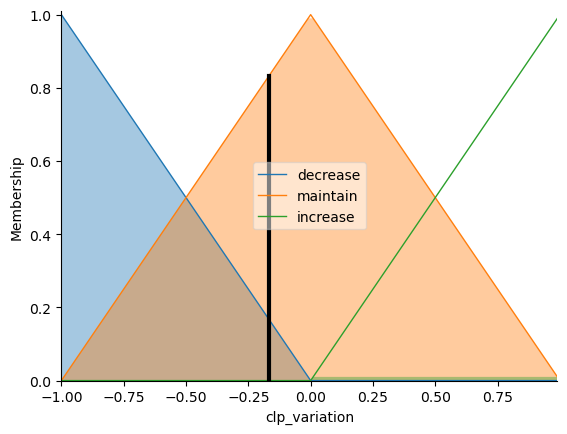

In [28]:
# Defining the input variables
memory_usage = ctrl.Antecedent(np.arange(0, 1, 0.01), 'memory_usage')
processor_load = ctrl.Antecedent(np.arange(0, 1, 0.01), 'processor_load')
output_bandwidth = ctrl.Antecedent(np.arange(0, 1, 0.01), 'output_bandwidth')
latency = ctrl.Antecedent(np.arange(0, 1000, 1), 'latency')
#input_network_throughput = ctrl.Antecedent(np.arange(0, 100, 1), 'input_network_throughput')
#output_network_throughput = ctrl.Antecedent(np.arange(0, 100, 1), 'output_network_throughput')


# Defining the output variable
clp_variation = ctrl.Consequent(np.arange(-1, 1, 0.01), 'clp_variation')

# Defining the membership functions for the input variables
# Note: The membership intervals and the terms used may vary depending on the specific problem
memory_usage.automf(3, names=['low', 'medium', 'high'])
processor_load.automf(3, names=['low', 'medium', 'high'])
#input_network_throughput.automf(3, names=['low', 'medium', 'high'])
#output_network_throughput.automf(3, names=['low', 'medium', 'high'])
output_bandwidth.automf(3, names=['low', 'medium', 'high'])
latency.automf(3, names=['low', 'medium', 'high'])

# Defining the membership functions for the output variable, 1st try
clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1  , -0.5, 0  ])
clp_variation['maintain'] = fuzz.trimf(clp_variation.universe, [-0.5, 0   , 0.5])
clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0   , 0.5 , 1  ])

# Defining the membership functions for the output variable, 2nd try
clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1, -1, 0-0])
clp_variation['maintain'] = fuzz.trimf(clp_variation.universe, [-1+0, 0, 1-0])
clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0+0, 1, 1])

# Defining the membership functions for the output variable, 3rd try
#clp_variation.automf(3, names=['decrease', 'maintain', 'increase'])


# Defining the rules
rule1a = ctrl.Rule(memory_usage['high'] | processor_load['high'], clp_variation['decrease'])
rule1a.weight = 3
rule1b = ctrl.Rule(memory_usage['low'] | processor_load['low'] , clp_variation['increase'])
rule1b.weight = 3     
rule1c = ctrl.Rule(memory_usage['low'] & processor_load['low'], clp_variation['increase'])
rule1c.weight = 3
rule1d = ctrl.Rule(memory_usage['medium'] & processor_load['medium'], clp_variation['maintain'])
rule1c.weight = 3

rule2a = ctrl.Rule(latency['high'] , clp_variation['increase'])
rule2a.weight = 2
rule2b = ctrl.Rule(latency['low'], clp_variation['decrease'])
rule2b.weight = 2
rule2c = ctrl.Rule(latency['medium'], clp_variation['maintain'])
rule2c.weight = 2

rule3a = ctrl.Rule(output_bandwidth['low'] , clp_variation['decrease'])
rule3a.weight = 1
rule3b = ctrl.Rule(output_bandwidth['high'], clp_variation['increase'])
rule3b.weight = 1
rule3c = ctrl.Rule(output_bandwidth['medium'], clp_variation['maintain'])
rule3c.weight = 1

# Creating the control system
clp_ctrl = ctrl.ControlSystem([rule1a, rule1b, rule1c, rule1d, rule2a, rule2b, rule2c, rule3a, rule3b, rule3c])


# Creating the simulator
clp_simulator = ctrl.ControlSystemSimulation(clp_ctrl)



# Testing our FIS


# Updating the variables
clp_simulator.input['memory_usage'] = 0.99 # 0.1
clp_simulator.input['processor_load'] = 0.99 # 0.1
#clp_simulator.input['input_network_throughput'] = 0.5
#clp_simulator.input['output_network_throughput'] = 0.4
clp_simulator.input['output_bandwidth'] = 0.5 # 0.1
clp_simulator.input['latency'] = 0.8 #200 / 1000


# Executing the simulation
clp_simulator.compute()

print(clp_simulator.output['clp_variation'])


# Checking the simulation result, and what it suggests
clp_variation.view(sim=clp_simulator)

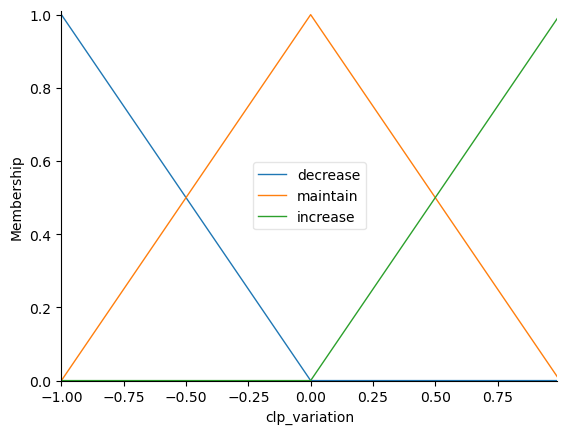

In [294]:
clp_variation.view()

## Using 3 levels on the output variable

Variables used:  ['memory_usage', 'processor_load', 'output_bandwidth', 'latency']


/home/caria/anaconda3/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


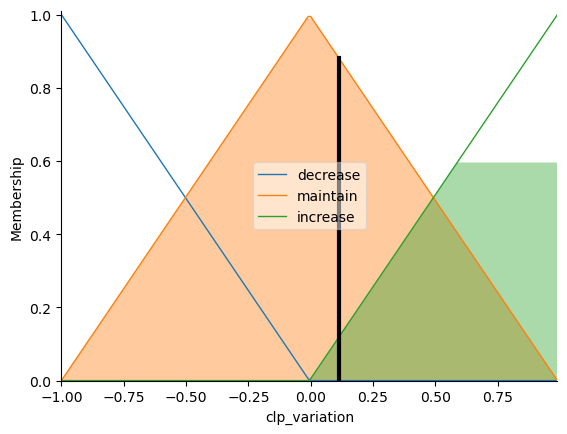

In [272]:
# Defining the variables you're using
variables_used = ['memory_usage', 'processor_load', 'output_bandwidth', 'latency']
# Printing the variables you're using
print('Variables used: ', variables_used)
# Variables left out: 
# input_network_throughput, output_network_throughput

# Defining the ranges for each variable
ranges = {
    'memory_usage': np.arange(0, 1, 0.01),
    'processor_load': np.arange(0, 1, 0.01),
    'output_bandwidth': np.arange(0, 1, 0.01),
    'latency': np.arange(0, 1, 0.01),
    'input_network_throughput': np.arange(0, 1, 0.01),
    'output_network_throughput': np.arange(0, 1, 0.01)
}

# Defining the Antecedents
antecedents = {var: ctrl.Antecedent(ranges[var], var) for var in variables_used}

# Defining the output variable
clp_variation = ctrl.Consequent(np.arange(-1, 1, 0.01), 'clp_variation')

# Defining the membership functions for the input variables
for var in variables_used:
    antecedents[var].automf(3, names=['low', 'medium', 'high'])

    



# Specifically defining the membership function for memor

# Defining the membership functions for the output variable
clp_variation.automf(3, names=['decrease', 'maintain', 'increase'])


# Defining the rules
rules = [
    ctrl.Rule(antecedents['memory_usage']['high'] | antecedents['processor_load']['high'], clp_variation['decrease']),
    ctrl.Rule(antecedents['memory_usage']['low'] | antecedents['processor_load']['low'], clp_variation['increase']),
    ctrl.Rule(antecedents['memory_usage']['low'] & antecedents['processor_load']['low'], clp_variation['increase']),
    ctrl.Rule(antecedents['memory_usage']['medium'] & antecedents['processor_load']['medium'], clp_variation['maintain']),
    ctrl.Rule(antecedents['latency']['high'], clp_variation['increase']),
    ctrl.Rule(antecedents['latency']['low'], clp_variation['decrease']),
    ctrl.Rule(antecedents['latency']['medium'], clp_variation['maintain']),
    ctrl.Rule(antecedents['output_bandwidth']['low'], clp_variation['decrease']),
    ctrl.Rule(antecedents['output_bandwidth']['high'], clp_variation['increase']),
    ctrl.Rule(antecedents['output_bandwidth']['medium'], clp_variation['maintain'])
]

# Defining the weights for each rule
weights = [3, 3, 3, 2, 2, 2, 2, 1, 1, 1]
use_different_weights = True
# Assigning the weights to the rules
if use_different_weights == True:
    for rule, weight in zip(rules, weights):
        rule.weight = weight

# Creating the control system
clp_ctrl = ctrl.ControlSystem(rules)

# Creating the simulator
clp_simulator = ctrl.ControlSystemSimulation(clp_ctrl)

# Values that will be used for the simulation
values = {
    'memory_usage': 0.2,
    'processor_load': 0.2,
    'output_bandwidth': 0.5,
    'latency': 0.6,
    'input_network_throughput': 0.2,
    'output_network_throughput': 0.15
}
# Keeping only the values that will be used
values_used = [values[var] for var in variables_used]

# Updating the variables
for i,var in enumerate(variables_used):
    clp_simulator.input[var] = values_used[i] 

# Executing the simulation
clp_simulator.compute()

# Checking the simulation result, and what it suggests
clp_variation.view(sim=clp_simulator)


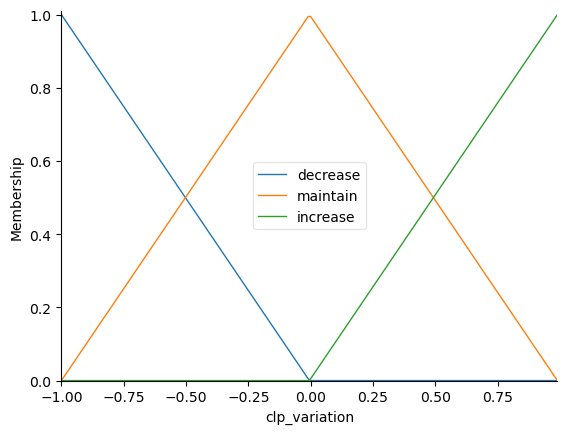

In [273]:
clp_variation.view()

In [177]:
# Obtaining the final suggestion
print('Final suggestion: ', clp_simulator.output['clp_variation'])

Final suggestion:  0.11228494113322215


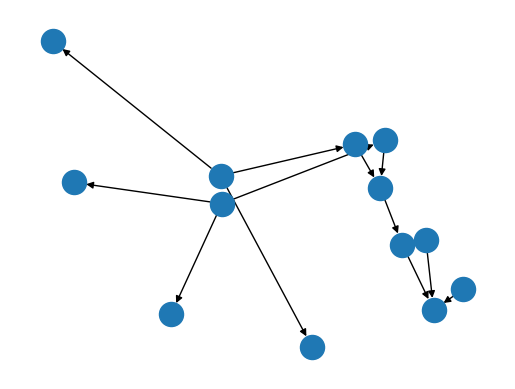

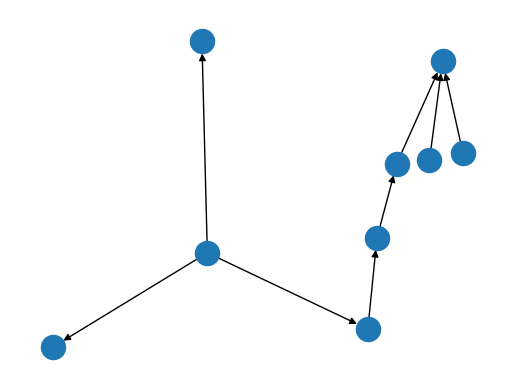

In [191]:
rules[0].view()
plt.show()

# instead, do the plot with labels
rule_to_see = rules[4]
# adding the labels
rule_to_see.label = 'If memory_usage is high or processor_load is high, then clp_variation is decrease'
rule_to_see.view()
plt.show()




## Using 2 levels on the output variable

Variables used:  ['memory_usage', 'processor_load']


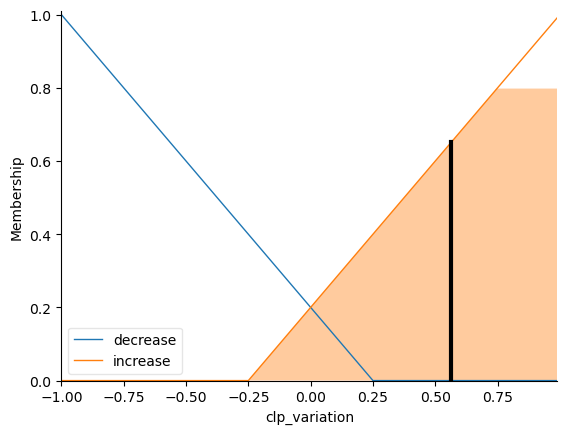

In [320]:
# Defining the variables you're using
#variables_used = ['memory_usage', 'processor_load', 'output_bandwidth', 'latency']
variables_used = ['memory_usage', 'processor_load']
# Printing the variables you're using
print('Variables used: ', variables_used)
# Variables left out: 
# input_network_throughput, output_network_throughput

# Defining the ranges for each variable
ranges = {
    'memory_usage': np.arange(0, 1, 0.01),
    'processor_load': np.arange(0, 1, 0.01),
    'output_bandwidth': np.arange(0, 1, 0.01),
    'latency': np.arange(0, 1, 0.01),
    'input_network_throughput': np.arange(0, 1, 0.01),
    'output_network_throughput': np.arange(0, 1, 0.01)
}

# Defining the Antecedents
antecedents = {var: ctrl.Antecedent(ranges[var], var) for var in variables_used}

# Defining the output variable
clp_variation = ctrl.Consequent(np.arange(-1, 1, 0.01), 'clp_variation')

# Defining the membership functions for the input variables
for var in variables_used:
    antecedents[var].automf(3, names=['low', 'medium', 'high'])

    



# Specifically defining the membership function for memor

# Defining the membership functions for the output variable
disparity = 0.25
clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1  , -1, 0+disparity])
clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0-disparity, 1 , 1  ])


# Defining the rules
rules = []
if 'memory_usage' in variables_used and 'processor_load' in variables_used:
    rules.append(ctrl.Rule(antecedents['memory_usage']['high'] | antecedents['processor_load']['high'], clp_variation['decrease']))
    rules.append(ctrl.Rule(antecedents['memory_usage']['low'] | antecedents['processor_load']['low'], clp_variation['increase']))
if 'latency' in variables_used:
    rules.append(ctrl.Rule(antecedents['latency']['high'], clp_variation['increase']))
    rules.append(ctrl.Rule(antecedents['latency']['low'], clp_variation['decrease']))
if 'output_bandwidth' in variables_used:
    rules.append(ctrl.Rule(antecedents['output_bandwidth']['low'], clp_variation['decrease']))
    rules.append(ctrl.Rule(antecedents['output_bandwidth']['high'], clp_variation['increase']))

# Creating the control system
clp_ctrl = ctrl.ControlSystem(rules)

# Creating the simulator
clp_simulator = ctrl.ControlSystemSimulation(clp_ctrl)

# Values that will be used for the simulation
values = {
    'memory_usage': 0.2,
    'processor_load': 0.1,
    'output_bandwidth': 0.5, # 0.5
    'latency': 0.6, # 0.6
    'input_network_throughput': 0.2,
    'output_network_throughput': 0.15
}
# Keeping only the values that will be used
values_used = [values[var] for var in variables_used]

# Updating the variables
for i,var in enumerate(variables_used):
    clp_simulator.input[var] = values_used[i] 

# Executing the simulation
clp_simulator.compute()

# Checking the simulation result, and what it suggests
clp_variation.view(sim=clp_simulator)


In [300]:
# Obtaining the final suggestion
print('Final suggestion: ', clp_simulator.output['clp_variation'])

Final suggestion:  0.5634418220954991


## As a function

In [14]:
def get_rules(which_rules, variables_used, ctrl, antecedents, clp_variation):
    rules = []
    if which_rules == 'old_rules':
        if 'memory_usage' in variables_used and 'processor_load' in variables_used:
            rules.append(ctrl.Rule(antecedents['memory_usage']['high'] | antecedents['processor_load']['high'], clp_variation['decrease']))
            rules.append(ctrl.Rule(antecedents['memory_usage']['low'] | antecedents['processor_load']['low'], clp_variation['increase']))
        if 'latency' in variables_used:
            rules.append(ctrl.Rule(antecedents['latency']['high'], clp_variation['increase']))
            rules.append(ctrl.Rule(antecedents['latency']['low'], clp_variation['decrease']))
        if 'output_bandwidth' in variables_used:
            rules.append(ctrl.Rule(antecedents['output_bandwidth']['low'], clp_variation['decrease']))
            rules.append(ctrl.Rule(antecedents['output_bandwidth']['high'], clp_variation['increase']))
   
    if which_rules == 'memory_usage+processor_load':
        # if both are high, then clp_variation is decreased
        rules.append(ctrl.Rule(antecedents['memory_usage']['high'] | antecedents['processor_load']['high'], clp_variation['decrease']))
        # if both are low, then clp_variation is increased
        rules.append(ctrl.Rule(antecedents['memory_usage']['low'] & antecedents['processor_load']['low'], clp_variation['increase']))
        # if both are medium, then clp_variation is increased
        rules.append(ctrl.Rule(antecedents['memory_usage']['medium'] & antecedents['processor_load']['medium'], clp_variation['increase']))
        # if one is low and the other is medium, then clp_variation is increased
        rules.append(ctrl.Rule(antecedents['memory_usage']['low'] & antecedents['processor_load']['medium'], clp_variation['increase']))
        rules.append(ctrl.Rule(antecedents['memory_usage']['medium'] & antecedents['processor_load']['low'], clp_variation['increase']))
    
    if which_rules == 'memory_usage+processor_load(3 mode clp)':
        # if both are high, then clp_variation is decreased
        rules.append(ctrl.Rule(antecedents['memory_usage']['high'] | antecedents['processor_load']['high'], clp_variation['decrease']))
        # if both are low, then clp_variation is increased
        rules.append(ctrl.Rule(antecedents['memory_usage']['low'] & antecedents['processor_load']['low'], clp_variation['increase']))
        # if both are medium, then clp_variation is maintained
        rules.append(ctrl.Rule(antecedents['memory_usage']['medium'] & antecedents['processor_load']['medium'], clp_variation['maintain']))
        # if one is low and the other is medium, then clp_variation is increased
        rules.append(ctrl.Rule(antecedents['memory_usage']['low'] & antecedents['processor_load']['medium'], clp_variation['increase']))
        rules.append(ctrl.Rule(antecedents['memory_usage']['medium'] & antecedents['processor_load']['low'], clp_variation['increase']))

    if which_rules == 'MU+PL+Band':
        # if MU or PL are high, then clp_variation is decreased
        rules.append(ctrl.Rule(antecedents['memory_usage']['high'] | antecedents['processor_load']['high'], clp_variation['decrease']))
        # if MU and PL are both either low or medium, then clp_variation is increased
        rules.append(ctrl.Rule(antecedents['memory_usage']['low'] & antecedents['processor_load']['low'], clp_variation['increase']))
        rules.append(ctrl.Rule(antecedents['memory_usage']['medium'] & antecedents['processor_load']['low'], clp_variation['increase']))
        rules.append(ctrl.Rule(antecedents['memory_usage']['low'] & antecedents['processor_load']['medium'], clp_variation['increase']))
        # if MU and PL are both medium, then bandwidth decides it
        rules.append(ctrl.Rule(antecedents['memory_usage']['medium'] & antecedents['processor_load']['medium'] & antecedents['output_bandwidth']['low'], clp_variation['decrease']))
        rules.append(ctrl.Rule(antecedents['memory_usage']['medium'] & antecedents['processor_load']['medium'] & antecedents['output_bandwidth']['high'], clp_variation['increase']))
        rules.append(ctrl.Rule(antecedents['memory_usage']['medium'] & antecedents['processor_load']['medium'] & antecedents['output_bandwidth']['medium'], clp_variation['increase']))

    if which_rules == 'PL (3 mode clp)':
        # if PL is high, then clp_variation is decreased
        rules.append(ctrl.Rule(antecedents['processor_load']['high'], clp_variation['decrease']))
        # if PL is low, then clp_variation is increased
        rules.append(ctrl.Rule(antecedents['processor_load']['low'], clp_variation['increase']))
        # if PL is medium, then clp_variation is maintained
        rules.append(ctrl.Rule(antecedents['processor_load']['medium'], clp_variation['maintain']))

    if which_rules == 'MU (3 mode clp)':
        # if MU is high, then clp_variation is decreased
        rules.append(ctrl.Rule(antecedents['memory_usage']['high'], clp_variation['decrease']))
        # if MU is low, then clp_variation is increased
        rules.append(ctrl.Rule(antecedents['memory_usage']['low'], clp_variation['increase']))
        # if MU is medium, then clp_variation is maintained
        rules.append(ctrl.Rule(antecedents['memory_usage']['medium'], clp_variation['maintain']))

    # for the ensemble method
    if which_rules == 'Bandwidth+Latency->NetworkEffort':
        # if bandwidth is low or latency is high, then network effort is high
        rules.append(ctrl.Rule(antecedents['output_bandwidth']['low'] | antecedents['latency']['high'], clp_variation['decrease']))
        # if both are medium, then network effort is medium
        rules.append(ctrl.Rule(antecedents['output_bandwidth']['medium'] & antecedents['latency']['medium'], clp_variation['maintain']))
        # if bandwidth is high and latency is low, then network effort is low
        rules.append(ctrl.Rule(antecedents['output_bandwidth']['high'] & antecedents['latency']['low'], clp_variation['increase']))
        # if bandwidth is medium and latency is low, then network effort is low
        rules.append(ctrl.Rule(antecedents['output_bandwidth']['medium'] & antecedents['latency']['low'], clp_variation['increase']))
        # if bandwidth is low and latency is medium, then network effort is low
        rules.append(ctrl.Rule(antecedents['output_bandwidth']['low'] & antecedents['latency']['medium'], clp_variation['increase']))

    # for the ensemble method
    if which_rules == 'MU+PL->computationalEffort':
        # if MU or PL are high, then computational effort is high
        rules.append(ctrl.Rule(antecedents['memory_usage']['high'] | antecedents['processor_load']['high'], clp_variation['decrease']))
        # if both are medium, then computational effort is medium
        rules.append(ctrl.Rule(antecedents['memory_usage']['medium'] & antecedents['processor_load']['medium'], clp_variation['maintain']))
        # if both are low, then computational effort is low
        rules.append(ctrl.Rule(antecedents['memory_usage']['low'] & antecedents['processor_load']['low'], clp_variation['increase']))
        # if MU is low and PL is medium, then computational effort is low
        rules.append(ctrl.Rule(antecedents['memory_usage']['low'] & antecedents['processor_load']['medium'], clp_variation['increase']))
        # if MU is medium and PL is low, then computational effort is low
        rules.append(ctrl.Rule(antecedents['memory_usage']['medium'] & antecedents['processor_load']['low'], clp_variation['increase']))
        
    # finally the ensemble method
    if which_rules == 'ensemble':
        # if computational effort is high or network effort is high, then clp_variation is decreased
        rules.append(ctrl.Rule(antecedents['computational_effort']['high'] | antecedents['network_effort']['high'], clp_variation['decrease']))
        # if computational effort is medium and network effort is medium, then clp_variation is increased
        rules.append(ctrl.Rule(antecedents['computational_effort']['medium'] & antecedents['network_effort']['medium'], clp_variation['increase']))
        # if computational effort is low and network effort is low, then clp_variation is increased
        rules.append(ctrl.Rule(antecedents['computational_effort']['low'] & antecedents['network_effort']['low'], clp_variation['increase']))
        # if computational effort is low and network effort is medium, then clp_variation is increased
        rules.append(ctrl.Rule(antecedents['computational_effort']['low'] & antecedents['network_effort']['medium'], clp_variation['increase']))
        # if computational effort is medium and network effort is low, then clp_variation is increased
        rules.append(ctrl.Rule(antecedents['computational_effort']['medium'] & antecedents['network_effort']['low'], clp_variation['increase']))
        
        
    


    return rules

# this function will receive the values of the variables, and return the suggestion (including the plot and numeric value of CLP variation)
def get_suggestion(which_rules, values, variables_used, CLPVariation_mode_n,disparity=0.25, plot=True):
    # Defining the ranges for each variable
    ranges = {
        'memory_usage': np.arange(0, 1, 0.01),
        'processor_load': np.arange(0, 1, 0.01),
        'output_bandwidth': np.arange(0, 1, 0.01),
        'latency': np.arange(0, 1, 0.01),
        'input_network_throughput': np.arange(0, 1, 0.01),
        'output_network_throughput': np.arange(0, 1, 0.01)
    }

    # Defining the Antecedents
    antecedents = {var: ctrl.Antecedent(ranges[var], var) for var in variables_used}

    # Defining the output variable
    clp_variation = ctrl.Consequent(np.arange(-1, 1, 0.01), 'clp_variation')

    # Defining the membership functions for the input variables
    for var in variables_used:
        antecedents[var].automf(3, names=['low', 'medium', 'high'])

    # Defining the membership functions for the output variable
    if CLPVariation_mode_n == 2:
        clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1  , -1, 0+disparity])
        clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0-disparity, 1 , 1  ])
    if CLPVariation_mode_n == 3:
        clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1  , -1, 0-disparity])
        clp_variation['maintain'] = fuzz.trimf(clp_variation.universe, [-1+np.abs(disparity), 0, 1-np.abs(disparity)]) #  [-1+2*disparity, 0, 1-2*disparity]
        clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0+disparity, 1 , 1  ])
    
    # Defining the rules
    rules = get_rules(which_rules, variables_used, ctrl, antecedents, clp_variation)
    
    # Creating the control system
    clp_ctrl = ctrl.ControlSystem(rules)

    # Creating the simulator
    clp_simulator = ctrl.ControlSystemSimulation(clp_ctrl)

    # Keeping only the values that will be used
    values_used = [values[var] for var in variables_used]

    # Updating the variables
    for i,var in enumerate(variables_used):
        clp_simulator.input[var] = values_used[i]
    
    # Executing the simulation
    clp_simulator.compute()

    # Checking the simulation result, and what it suggests
    if plot == True:
        clp_variation.view(sim=clp_simulator)
    
    # Obtaining the final suggestion
    suggestion = clp_simulator.output['clp_variation']

    return suggestion


## Getting the dataset

In [16]:
# Getting the values from the csv dataset
import pandas as pd
df = pd.read_csv('Project2_SampleData.csv')
df_original = df.copy()
df

,MemoryUsage,ProcessorLoad,InpNetThroughput,OutNetThroughput,OutBandwidth,Latency,V_MemoryUsage,V_ProcessorLoad,V_InpNetThroughput,V_OutNetThroughput,V_OutBandwidth,V_Latency,CLPVariation
0,0.68,0.60,0.65,0.70,0.72,0.80,0.45,0.52,0.50,0.48,0.45,0.48,0.73
1,0.65,0.95,0.87,0.75,0.88,0.53,0.60,0.52,0.50,0.52,0.48,0.52,-0.82
2,0.68,0.60,0.60,0.65,0.74,0.40,0.45,0.52,0.50,0.48,0.46,0.48,0.12
3,1.00,1.00,1.00,1.00,1.00,1.00,0.50,0.50,0.50,0.50,0.50,0.50,-0.85
4,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50
5,0.65,0.50,0.70,0.23,0.80,1.00,0.40,0.45,0.51,0.45,0.30,0.55,0.80
6,0.83,0.78,0.87,0.78,0.20,0.50,0.59,0.45,0.55,0.52,0.49,0.52,-0.31
7,0.83,0.78,0.78,0.79,0.78,0.50,0.45,0.53,0.56,0.48,0.46,0.48,-0.65
8,0.39,0.42,0.73,0.62,0.78,0.50,0.56,0.67,0.58,0.55,0.52,0.60,0.85
9,0.20,0.10,0.20,0.15,0.50,0.60,0.56,0.67,0.58,0.55,0.52,0.60,0.85


In [15]:
def inspect_model(instance,which_rules, variables_used,CLPVariation_mode_n, disparity=0.25, plot=True):
    # Getting the values from the csv dataset
    import pandas as pd
    df = pd.read_csv('Project2_SampleData.csv')

    # Utilizing the function to get the suggestion for one instance

    # Updating the variable values for this instance
    values = {
        'memory_usage': df['MemoryUsage'][instance],
        'processor_load': df['ProcessorLoad'][instance],
        'output_bandwidth': df['OutBandwidth'][instance],
        'latency': df['Latency'][instance],
        'input_network_throughput': df['InpNetThroughput'][instance],
        'output_network_throughput': df['OutNetThroughput'][instance]
    }
    
    suggestion = get_suggestion(which_rules, values, variables_used, CLPVariation_mode_n,disparity, plot=True)
    # add the actual value to the plot
    plt.axvline(x=df['CLPVariation'][instance], color='g', linestyle='--')
    plt.legend(['Decrease mf', 'Increase mf', 'Dec. activation', 'Inc. activation', 'Suggestion', 'Actual value'])
    plt.title('Suggestion based on '+which_rules + ' for instance ' + str(instance))
    plt.show()

    # Comparing the suggestion with the actual value
    print('Suggestion: ', suggestion, ' Actual value: ', df['CLPVariation'][instance])

## Testing the FIS:

/home/caria/anaconda3/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


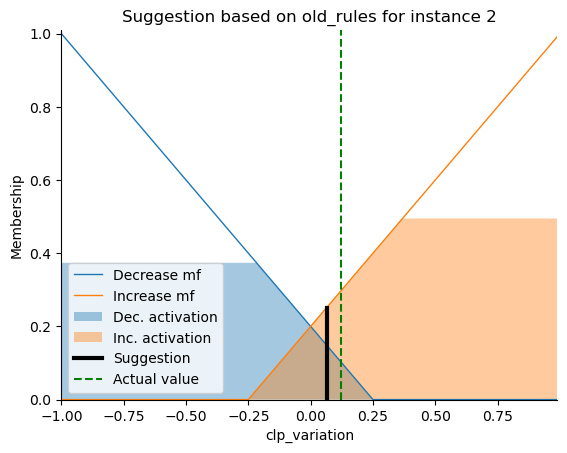

Suggestion:  0.06371273107131904  Actual value:  0.12


In [226]:
# Utilizing the function to get the suggestion for one instance
inspect_model(instance=2,which_rules='old_rules', variables_used=['memory_usage', 'processor_load', 'output_bandwidth', 'latency'],CLPVariation_mode_n=2, disparity=0.25, plot=True)

/home/caria/anaconda3/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


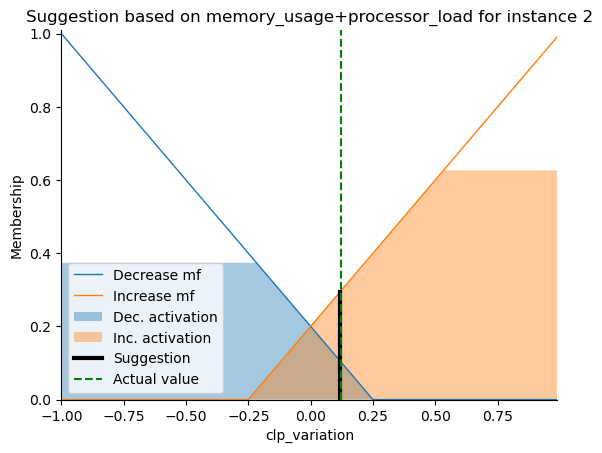

Suggestion:  0.11752712976126713  Actual value:  0.12


In [43]:
# Utilizing the function to get the suggestion for one instance
inspect_model(instance=2,which_rules='memory_usage+processor_load', variables_used=['memory_usage', 'processor_load'],CLPVariation_mode_n=2, disparity=0.25, plot=True)

/home/caria/anaconda3/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


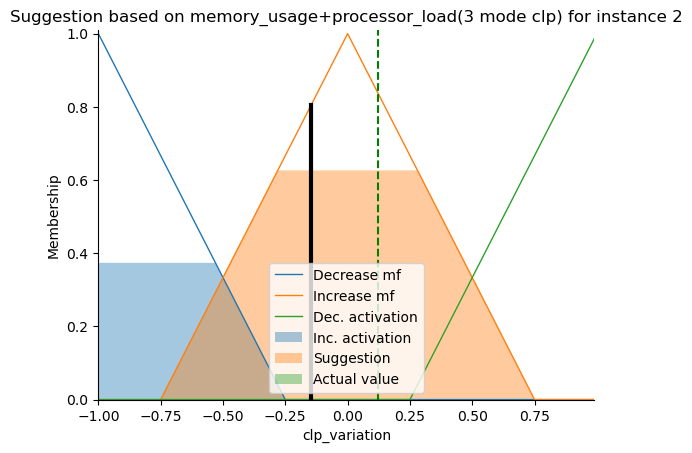

Suggestion:  -0.14627662567642236  Actual value:  0.12


In [312]:
# Utilizing the function to get the suggestion for one instance
inspect_model(instance=2,which_rules='memory_usage+processor_load(3 mode clp)', variables_used=['memory_usage', 'processor_load'],CLPVariation_mode_n=3, disparity=0.25, plot=True)


/home/caria/anaconda3/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


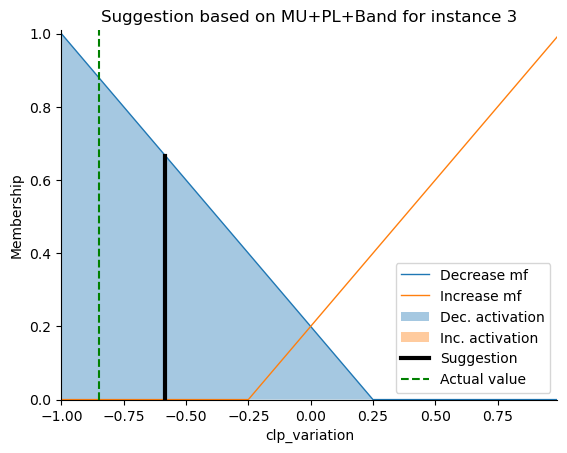

Suggestion:  -0.583333333333333  Actual value:  -0.85


In [240]:
# Utilizing the function to get the suggestion for one instance
inspect_model(instance=3,which_rules='MU+PL+Band', variables_used=['memory_usage', 'processor_load', 'output_bandwidth'],CLPVariation_mode_n=2, disparity=0.25, plot=True)

/home/caria/anaconda3/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


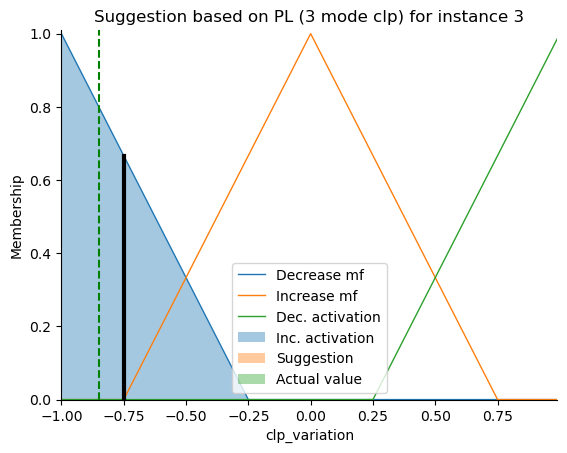

Suggestion:  -0.7499999999999999  Actual value:  -0.85


In [237]:
# Utilizing the function to get the suggestion for one instance
inspect_model(instance=3,which_rules='PL (3 mode clp)', variables_used=['processor_load'],CLPVariation_mode_n=3, disparity=0.25, plot=True)

/home/caria/anaconda3/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


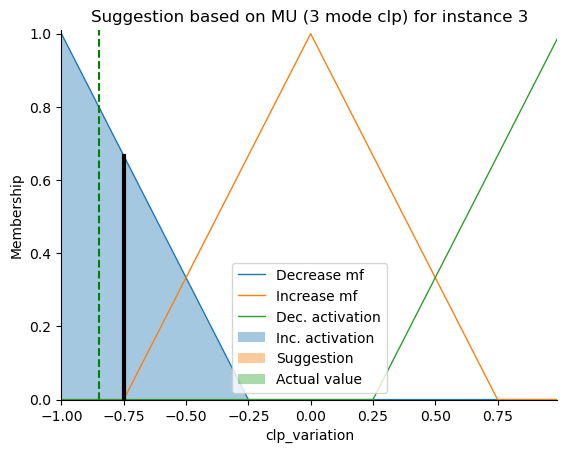

Suggestion:  -0.7499999999999999  Actual value:  -0.85


In [238]:
inspect_model(instance=3,which_rules='MU (3 mode clp)', variables_used=['memory_usage'],CLPVariation_mode_n=3, disparity=0.25, plot=True)

## Other stuff

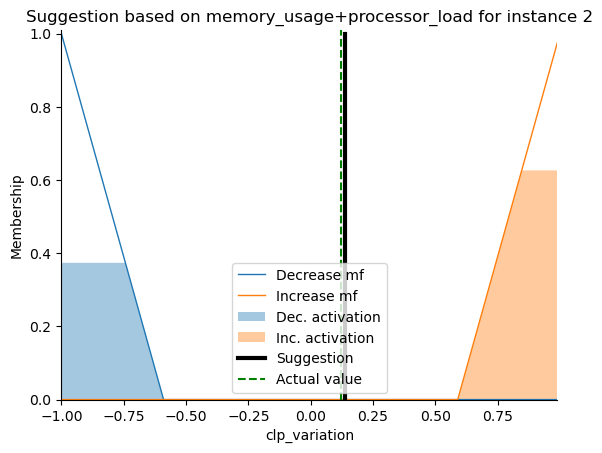

In [269]:
# checking individual suggestions for the best disparity value (plots)
# memory_usage+processor_load
instance = 2
values = {
    'memory_usage': df['MemoryUsage'][instance],
    'processor_load': df['ProcessorLoad'][instance],
    'output_bandwidth': df['OutBandwidth'][instance],
    'latency': df['Latency'][instance],
    'input_network_throughput': df['InpNetThroughput'][instance],
    'output_network_throughput': df['OutNetThroughput'][instance]
}

variables_used = ['memory_usage', 'processor_load']

which_rules = 'memory_usage+processor_load' 
CLPVariation_mode_n = 2 
suggestion = get_suggestion(which_rules, values, variables_used, CLPVariation_mode_n,disparity=best_disparity, plot=True)
plt.axvline(x=df['CLPVariation'][instance], color='g', linestyle='--')
plt.legend(['Decrease mf', 'Increase mf', 'Dec. activation', 'Inc. activation', 'Suggestion', 'Actual value'])
plt.title('Suggestion based on '+which_rules + ' for instance ' + str(instance))
plt.show()

# MU+PL+Band
variables_used = ['memory_usage', 'processor_load', 'output_bandwidth']
which_rules = 'MU+PL+Band'



## Combs Method

### first modifying the main function

In [19]:
def get_suggestionMOD(which_rules, values, variables_used, CLPVariation_mode_n,output_range,disparity=0.25, plot=False):
    # Defining the ranges for each variable
    ranges = {
        'memory_usage': np.arange(0, 1, 0.01),
        'processor_load': np.arange(0, 1, 0.01),
        'output_bandwidth': np.arange(0, 1, 0.01),
        'latency': np.arange(0, 1, 0.01),
        'input_network_throughput': np.arange(0, 1, 0.01),
        'output_network_throughput': np.arange(0, 1, 0.01),
        'computational_effort': np.arange(0, 1, 0.01),
        'network_effort': np.arange(0, 1, 0.01)
    }

    # Defining the Antecedents
    antecedents = {var: ctrl.Antecedent(ranges[var], var) for var in variables_used}

    # Defining the output variable
    clp_variation = ctrl.Consequent(np.arange(output_range[0], output_range[1], 0.01), 'clp_variation')

    # Defining the membership functions for the input variables
    for var in variables_used:
        antecedents[var].automf(3, names=['low', 'medium', 'high'])

    # Defining the membership functions for the output variable
    if CLPVariation_mode_n == 2:
        clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1  , -1, 0+disparity])
        clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0-disparity, 1 , 1  ])
    if CLPVariation_mode_n == 3:
        # automf
        clp_variation.automf(3, names=['decrease', 'maintain', 'increase'])
    


    # Defining the rules
    rules = get_rules(which_rules, variables_used, ctrl, antecedents, clp_variation)
    
    # Creating the control system
    clp_ctrl = ctrl.ControlSystem(rules)

    # Creating the simulator
    clp_simulator = ctrl.ControlSystemSimulation(clp_ctrl)

    # Keeping only the values that will be used
    values_used = [values[var] for var in variables_used]

    # Updating the variables
    for i,var in enumerate(variables_used):
        clp_simulator.input[var] = values_used[i]
    
    # Executing the simulation
    clp_simulator.compute()

    # Checking the simulation result, and what it suggests
    if plot == True:
        clp_variation.view(sim=clp_simulator)
    
    # Obtaining the final suggestion
    suggestion = clp_simulator.output['clp_variation']

    return suggestion

### now getting to it

In [49]:
# Combs method
# first we create a FIS suggestion for the variables 'memory_usage' and 'processor_load', with output variable 'Computational Effort'


# second we create a FIS suggestion for the variables 'bandwidth' and 'latency', with output variable 'Network Effort'
def Bandwidth_Latency_suggest_NetEFF(df):
    suggestions = []
    for instance in range(len(df)):
        values = {
            'output_bandwidth': df['OutBandwidth'][instance],
            'latency': df['Latency'][instance]
        }
        which_rules = 'Bandwidth+Latency->NetworkEffort'
        variables_used = ['output_bandwidth', 'latency']
        CLPVariation_mode_n = 3
        output_range = [0,1]
        disparity = 0
        suggestion = get_suggestionMOD(which_rules, values, variables_used, CLPVariation_mode_n,output_range,disparity, plot=False)
        suggestions.append(suggestion)
    return suggestions

def MU_PL_suggest_CompEff(df):
    suggestions = []
    for instance in range(len(df)):
        values = {
            'memory_usage': df['MemoryUsage'][instance],
            'processor_load': df['ProcessorLoad'][instance]
        }
        which_rules = 'MU+PL->computationalEffort'
        variables_used = ['memory_usage', 'processor_load']
        CLPVariation_mode_n = 3
        output_range = [0,1]
        disparity = 0
        suggestion = get_suggestionMOD(which_rules, values, variables_used, CLPVariation_mode_n,output_range,disparity, plot=False)
        suggestions.append(suggestion)
    return suggestions

# finally we combine the two previous suggestions to get the final suggestion
def get_combs_method(df, disparity_used):
    suggestions = []
    computational_effort = MU_PL_suggest_CompEff(df)
    network_effort = Bandwidth_Latency_suggest_NetEFF(df)

    # Creating a new dataframe with only these efforts, which are lists
    df_efforts = pd.DataFrame({'computational_effort': computational_effort, 'network_effort': network_effort})

    # Applying a suggestion for the CLP variation based on the two efforts
    for instance in range(0,len(df_efforts)):
        values = {
            'computational_effort': df_efforts['computational_effort'][instance],
            'network_effort': df_efforts['network_effort'][instance]
        }
        which_rules = 'ensemble'
        variables_used = ['computational_effort', 'network_effort']
        CLPVariation_mode_n = 2
        output_range = [-1,1]
        suggestion = get_suggestionMOD(which_rules, values, variables_used, CLPVariation_mode_n,output_range,disparity=disparity_used, plot=False)
        suggestions.append(suggestion)
    return suggestions   



In [51]:
# testing the combs method
suggestions_ensemble = combs_method_suggestions = get_combs_method(df_original,disparity_used=-0.25)


# performance evaluation
ensemble_RMSE = get_RMSE(suggestions_ensemble, df_original)
print('RMSE for the ensemble method: ', ensemble_RMSE)

RMSE for the ensemble method:  0.9223185195114841


## Performance analysis

In [54]:
# Now we want to study the performance of the FIS
# We will use the RMSE metric

# First a function to get the FIS suggestion for all instances
def get_all_suggestions(which_rules, variables_used, CLPVariation_mode_n, disparity, df):

    # Initializing the list of suggestions
    suggestions = []
    # Iterating over all instances
    for instance in range(len(df)):
        # Updating the variable values for this instance
        values = {
            'memory_usage': df['MemoryUsage'][instance],
            'processor_load': df['ProcessorLoad'][instance],
            'output_bandwidth': df['OutBandwidth'][instance],
            'latency': df['Latency'][instance],
            'input_network_throughput': df['InpNetThroughput'][instance],
            'output_network_throughput': df['OutNetThroughput'][instance]
        }

        # Getting the suggestion
        suggestion = get_suggestion(which_rules, values, variables_used, CLPVariation_mode_n,disparity, plot=False)
        suggestions.append(suggestion)
    
    return suggestions


# Now, RMSE for performance evaluation
def get_RMSE(suggestions, df):
    # Getting the actual values
    actual_values = df['CLPVariation']
    # Calculating the RMSE
    RMSE = np.sqrt(np.mean((suggestions - actual_values)**2))
    return RMSE


# old rules suggestions
rules = 'old_rules'
variables_used = ['memory_usage', 'processor_load', 'output_bandwidth', 'latency']
CLPVariation_mode_n = 2
disparity = 0.25
suggestions = get_all_suggestions(rules, variables_used, CLPVariation_mode_n, disparity, df)

old_rules_RMSE = get_RMSE(suggestions, df)


# memory_usage+processor_load suggestions
rules = 'memory_usage+processor_load'
variables_used = ['memory_usage', 'processor_load']
CLPVariation_mode_n = 2 
disparity = 0.25
suggestions = get_all_suggestions(rules, variables_used, CLPVariation_mode_n, disparity, df)

memory_usage_processor_load_RMSE = get_RMSE(suggestions, df)


# memory_usage+processor_load(3 mode clp) suggestions
rules = 'memory_usage+processor_load(3 mode clp)'
variables_used = ['memory_usage', 'processor_load']
CLPVariation_mode_n = 3
disparity = 0.25
suggestions = get_all_suggestions(rules, variables_used, CLPVariation_mode_n, disparity, df)

memory_usage_processor_load_3_mode_clp_RMSE = get_RMSE(suggestions, df)

# MU+PL+Band suggestions
rules = 'MU+PL+Band'
variables_used = ['memory_usage', 'processor_load', 'output_bandwidth']
CLPVariation_mode_n = 3
disparity = 0.25
suggestions = get_all_suggestions(rules, variables_used, CLPVariation_mode_n, disparity, df)

MU_PL_Band_RMSE = get_RMSE(suggestions, df)

# PL suggestions
rules = 'PL (3 mode clp)'
variables_used = ['processor_load']
CLPVariation_mode_n = 3
disparity = 0.25
suggestions = get_all_suggestions(rules, variables_used, CLPVariation_mode_n, disparity, df)

PL_3_mode_clp_RMSE = get_RMSE(suggestions, df)

# MU suggestions
rules = 'MU (3 mode clp)'
variables_used = ['memory_usage']
CLPVariation_mode_n = 3
disparity = 0.25
suggestions = get_all_suggestions(rules, variables_used, CLPVariation_mode_n, disparity, df)

MU_3_mode_clp_RMSE = get_RMSE(suggestions, df)

# Combs method
rules = 'ensemble'
variables_used = ['computational_effort', 'network_effort']
CLPVariation_mode_n = 2
disparity = 0.25
suggestions = get_combs_method(df, disparity_used=disparity)

combs_method_RMSE = get_RMSE(suggestions, df)


# Instead of individual prints, let's present the results in a table
import pandas as pd
results = pd.DataFrame(columns=['Rules', 'Variables used', 'CLP variation mode', 'Disparity', 'RMSE'])
results.loc[0] = ['Old rules', 'memory_usage, processor_load, output_bandwidth, latency', '2', '0.25', old_rules_RMSE]
results.loc[1] = ['Memory usage + processor load', 'memory_usage, processor_load', '2', '0.25', memory_usage_processor_load_RMSE]
results.loc[2] = ['Memory usage + processor load (3 mode clp)', 'memory_usage, processor_load', '3', '0.25', memory_usage_processor_load_3_mode_clp_RMSE]
results.loc[3] = ['MU + PL + Band', 'memory_usage, processor_load, output_bandwidth', '3', '0.25', MU_PL_Band_RMSE]
results.loc[4] = ['PL (3 mode clp)', 'processor_load', '3', '0.25', PL_3_mode_clp_RMSE]
results.loc[5] = ['MU (3 mode clp)', 'memory_usage', '3', '0.25', MU_3_mode_clp_RMSE]
results.loc[6] = ['Combs method', 'computational_effort, network_effort', '2', '0.25', combs_method_RMSE]
results

,Rules,Variables used,CLP variation mode,Disparity,RMSE
0,Old rules,"memory_usage, processor_load, output_bandwidth...",2,0.25,0.539870
1,Memory usage + processor load,"memory_usage, processor_load",2,0.25,0.371449
2,Memory usage + processor load (3 mode clp),"memory_usage, processor_load",3,0.25,0.544348
3,MU + PL + Band,"memory_usage, processor_load, output_bandwidth",3,0.25,0.340585
4,PL (3 mode clp),processor_load,3,0.25,0.515668
5,MU (3 mode clp),memory_usage,3,0.25,0.593033
6,Combs method,"computational_effort, network_effort",2,0.25,0.817394


In [52]:
# summing up this process of finding the best disparity value in a function
def get_best_disparity(rules, variables_used, CLPVariation_mode_n, disparities, df):
    RMSEs = np.array([])
    for disparity in disparities:
        suggestions = get_all_suggestions(rules, variables_used, CLPVariation_mode_n, disparity, df)
        rmse = get_RMSE(suggestions, df)
        # appending the RMSE to the list of RMSEs
        RMSEs = np.append(RMSEs, rmse)
    average_MSE_RMSE = (RMSEs + RMSEs**2)/2
    best_disparity = disparities[np.argmin(average_MSE_RMSE)]
    return best_disparity, RMSEs, average_MSE_RMSE

# summing up this process of finding the best disparity value in a function
def get_best_disparityMOD(rules, variables_used, CLPVariation_mode_n, disparities, df):
    RMSEs = np.array([])
    for disparity in disparities:
        suggestions = get_combs_method(df, disparity)
        rmse = get_RMSE(suggestions, df)
        # appending the RMSE to the list of RMSEs
        RMSEs = np.append(RMSEs, rmse)
    average_MSE_RMSE = (RMSEs + RMSEs**2)/2
    best_disparity = disparities[np.argmin(average_MSE_RMSE)]
    return best_disparity, RMSEs, average_MSE_RMSE 

In [61]:
# Setting up a grid search to find the best disparity value
# old rules suggestions
rules = 'old_rules'
variables_used = ['memory_usage', 'processor_load', 'output_bandwidth', 'latency']
CLPVariation_mode_n = 2
disparities = np.arange(-0.9, 0.9, 0.01)
best_disparity, RMSEs, average_MSE_RMSE = get_best_disparity(rules, variables_used, CLPVariation_mode_n, disparities, df_original)

# Saving the results for a later plot with all cases
old_rules_metric = average_MSE_RMSE

# Best disparity value
print('Best disparity value: ', best_disparity)

# Metrics for the best disparity value
print('average_MSE_RMSE: ', average_MSE_RMSE[np.argmin(average_MSE_RMSE)])

Best disparity value:  -0.37999999999999956
average_MSE_RMSE:  0.40451725521904136


In [60]:
# Setting up a grid search to find the best disparity value
# memory_usage+processor_load suggestions
# Testing the function
rules = 'memory_usage+processor_load'
variables_used = ['memory_usage', 'processor_load']
CLPVariation_mode_n = 2
disparities = np.arange(-0.9, 0.9, 0.01)
best_disparity,RMSEs,average_MSE_RMSE = get_best_disparity(rules, variables_used, CLPVariation_mode_n, disparities, df_original)

# Saving the results for a later plot with all cases 
memory_usage_processor_load_metric = average_MSE_RMSE

# Best disparity value
print('Best disparity value: ', best_disparity)

# Metric for the best disparity value
print('average_MSE_RMSE: ', average_MSE_RMSE[np.argmin(average_MSE_RMSE)])

Best disparity value:  -0.5899999999999997
average_MSE_RMSE:  0.20944265004507928


In [59]:
# Setting up a grid search to find the best disparity value
# memory_usage+processor_load(3 mode clp) suggestions
rules = 'memory_usage+processor_load(3 mode clp)'
variables_used = ['memory_usage', 'processor_load']
CLPVariation_mode_n = 3
disparities = np.arange(-0.9, 0.9, 0.01)
best_disparity,RMSEs,average_MSE_RMSE = get_best_disparity(rules, variables_used, CLPVariation_mode_n, disparities, df_original)

# Saving the results for a later plot with all cases
memory_usage_processor_load_3_mode_clp_metric = average_MSE_RMSE

# Best disparity value
print('Best disparity value: ', best_disparity)

# Metric for the best disparity value
print('average_MSE_RMSE: ', average_MSE_RMSE[np.argmin(average_MSE_RMSE)])


Best disparity value:  0.11000000000000087
average_MSE_RMSE:  0.4183843820654607


In [58]:
# Setting up a grid search to find the best disparity value
# MU+PL+Band suggestions
rules = 'MU+PL+Band'
variables_used = ['memory_usage', 'processor_load', 'output_bandwidth']
CLPVariation_mode_n = 2
disparities = np.arange(-0.9, 0.9, 0.01)
best_disparity,RMSEs,average_MSE_RMSE = get_best_disparity(rules, variables_used, CLPVariation_mode_n, disparities, df_original)

# Saving the results for a later plot with all cases
MU_PL_Band_metric = average_MSE_RMSE

# Best disparity value
print('Best disparity value: ', best_disparity)

# Metric for the best disparity value
print('average_MSE_RMSE: ', average_MSE_RMSE[np.argmin(average_MSE_RMSE)])

Best disparity value:  -0.5899999999999997
average_MSE_RMSE:  0.2188046169420147


In [57]:
# Setting up a grid search to find the best disparity value
# PL (3 mode clp) suggestions
rules = 'PL (3 mode clp)'
variables_used = ['processor_load']
CLPVariation_mode_n = 3
disparities = np.arange(-0.9, 0.9, 0.01)
best_disparity,RMSEs,average_MSE_RMSE = get_best_disparity(rules, variables_used, CLPVariation_mode_n, disparities, df_original)

# Saving the results for a later plot with all cases
PL_3_mode_clp_metric = average_MSE_RMSE

# Best disparity value
print('Best disparity value: ', best_disparity)

# Metric for the best disparity value
print('average_MSE_RMSE: ', average_MSE_RMSE[np.argmin(average_MSE_RMSE)])

Best disparity value:  0.7900000000000015
average_MSE_RMSE:  0.3790878575092221


In [56]:
# Setting up a grid search to find the best disparity value
# MU (3 mode clp) suggestions
rules = 'MU (3 mode clp)'
variables_used = ['memory_usage']
CLPVariation_mode_n = 3
disparities = np.arange(-0.9, 0.9, 0.01)
best_disparity,RMSEs,average_MSE_RMSE = get_best_disparity(rules, variables_used, CLPVariation_mode_n, disparities, df_original)

# Saving the results for a later plot with all cases
MU_3_mode_clp_metric = average_MSE_RMSE

# Best disparity value
print('Best disparity value: ', best_disparity)

# Metric for the best disparity value
print('average_MSE_RMSE: ', average_MSE_RMSE[np.argmin(average_MSE_RMSE)])

Best disparity value:  0.42000000000000115
average_MSE_RMSE:  0.47125890580084573


In [63]:
# Setting up a grid search to find the best disparity value
# ensemble suggestions
rules = 'ensemble'
variables_used = ['computational_effort', 'network_effort']
CLPVariation_mode_n = 3
disparities = np.arange(-0.9, 0.9, 0.01)
best_disparity,RMSEs,average_MSE_RMSE = get_best_disparityMOD(rules, variables_used, CLPVariation_mode_n, disparities, df_original)

# Saving the results for a later plot with all cases
ensemble_metric = average_MSE_RMSE

# Best disparity value
print('Best disparity value: ', best_disparity)

# Metric for the best disparity value
print('average_MSE_RMSE: ', average_MSE_RMSE[np.argmin(average_MSE_RMSE)])


Best disparity value:  0.8900000000000016
average_MSE_RMSE:  0.6072781631248074


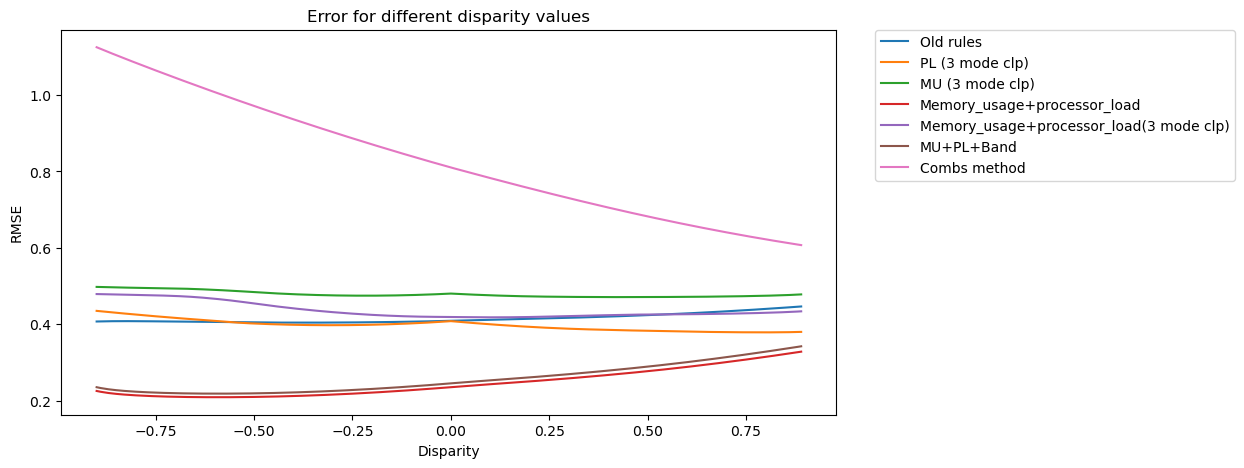

In [65]:
# Plotting the RMSE for all cases
plt.figure(figsize=(10,5))
plt.plot(disparities, old_rules_metric, label='Old rules')
plt.plot(disparities, PL_3_mode_clp_metric, label='PL (3 mode clp)')
plt.plot(disparities, MU_3_mode_clp_metric, label='MU (3 mode clp)')
plt.plot(disparities, memory_usage_processor_load_metric, label='Memory_usage+processor_load')
plt.plot(disparities, memory_usage_processor_load_3_mode_clp_metric, label='Memory_usage+processor_load(3 mode clp)')
plt.plot(disparities, MU_PL_Band_metric, label='MU+PL+Band')
plt.plot(disparities, ensemble_metric, label='Combs method')
plt.xlabel('Disparity')
plt.ylabel('RMSE')
plt.title('Error for different disparity values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()